In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
N = 600

t = np.arange(0, N, 1).reshape(-1,1)
t = np.array([t[i] + np.random.rand(1)/4 for i in range(len(t))])
t = np.array([t[i] - np.random.rand(1)/7 for i in range(len(t))])
t = np.array(np.round(t, 2))

x1 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)
x2 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)
x3 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)

n = np.round((np.random.random(N) * 2).reshape(-1,1), 2)

y = np.array([((np.log(np.abs(2 + x1[t])) - x2[t-1]**2) + 0.02*x3[t-3]*np.exp(x1[t-1])) for t in range(len(t))])
y = np.round(y+n, 2)

In [3]:
dataset = pd.DataFrame(np.concatenate((t, x1, x2, x3, y), axis=1), 
                       columns=['t', 'x1', 'x2', 'x3', 'y'])

deltaT = np.array([(dataset.t[i + 1] - dataset.t[i]) for i in range(len(dataset)-1)])
deltaT = np.concatenate((np.array([0]), deltaT))

dataset.insert(1, '∆t', deltaT)
dataset.head(10)

,t,∆t,x1,x2,x3,y
0,0.07,0.00,1.73,4.60,3.99,5.59
1,0.99,0.92,1.07,3.50,3.60,-17.78
2,2.12,1.13,1.43,3.41,1.31,-10.03
3,3.15,1.03,2.74,1.60,4.48,-8.19
4,4.17,1.02,3.15,3.90,3.50,0.50
5,4.91,0.74,2.34,1.03,0.61,-12.54
6,6.09,1.18,1.18,2.13,3.31,2.33
7,7.13,1.04,0.82,0.28,2.31,-3.12
8,8.16,1.03,4.15,3.54,2.20,1.99
9,9.11,0.95,3.77,3.38,2.23,-5.72


In [70]:
trainset = pd.DataFrame(create_a_row)
trainset

,t(0),∆t(0),x1(0),x2(0),x3(0),t(1),∆t(1),x1(1),x2(1),x3(1),t(2),∆t(2),x1(2),x2(2),x3(2),t(3),∆t(3),x1(3),x2(3),x3(3)
0,0.16,0.00,2.20,1.52,0.29,1.10,0.94,3.03,4.77,3.53,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80
1,1.10,0.94,3.03,4.77,3.53,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78
2,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31
3,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,6.00,0.95,2.64,0.41,3.81
4,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,6.00,0.95,2.64,0.41,3.81,7.02,1.02,1.14,1.54,4.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,591.96,1.02,4.35,3.17,0.54,593.16,1.20,4.00,4.08,0.45,594.02,0.86,3.66,3.51,3.27,594.90,0.88,3.88,1.35,0.07
593,593.16,1.20,4.00,4.08,0.45,594.02,0.86,3.66,3.51,3.27,594.90,0.88,3.88,1.35,0.07,596.03,1.13,2.61,2.22,4.03
594,594.02,0.86,3.66,3.51,3.27,594.90,0.88,3.88,1.35,0.07,596.03,1.13,2.61,2.22,4.03,597.13,1.10,0.57,1.65,4.87
595,594.90,0.88,3.88,1.35,0.07,596.03,1.13,2.61,2.22,4.03,597.13,1.10,0.57,1.65,4.87,598.06,0.93,0.52,2.26,0.13


In [132]:
window_size = 4
create_a_row = reshape_to_window(dataset,window_size,include_target=True)
create_a_row

None        t(0)  ∆t(0)  x1(0)  x2(0)  x3(0)   y(0)    t(1)  ∆t(1)  x1(1)  x2(1)  \
0      0.07   0.00   1.73   4.60   3.99   5.59    0.99   0.92   1.07   3.50   
1      0.99   0.92   1.07   3.50   3.60 -17.78    2.12   1.13   1.43   3.41   
2      2.12   1.13   1.43   3.41   1.31 -10.03    3.15   1.03   2.74   1.60   
3      3.15   1.03   2.74   1.60   4.48  -8.19    4.17   1.02   3.15   3.90   
4      4.17   1.02   3.15   3.90   3.50   0.50    4.91   0.74   2.34   1.03   
..      ...    ...    ...    ...    ...    ...     ...    ...    ...    ...   
592  591.93   0.99   2.51   2.28   4.30   0.85  593.06   1.13   4.47   4.88   
593  593.06   1.13   4.47   4.88   0.63  -2.48  594.14   1.08   4.65   3.15   
594  594.14   1.08   4.65   3.15   2.02 -19.69  595.02   0.88   4.63   2.77   
595  595.02   0.88   4.63   2.77   1.60   2.45  596.16   1.14   4.31   2.75   
596  596.16   1.14   4.31   2.75   0.43  -2.58  597.06   0.90   0.75   1.53   

     ...  ∆t(2)  x1(2)  x2(2)  x3(2)   y(2)   

,t(0),∆t(0),x1(0),x2(0),x3(0),y(0),t(1),∆t(1),x1(1),x2(1),...,∆t(2),x1(2),x2(2),x3(2),y(2),t(3),∆t(3),x1(3),x2(3),x3(3)
0,0.07,0.00,1.73,4.60,3.99,5.59,0.99,0.92,1.07,3.50,...,1.13,1.43,3.41,1.31,-10.03,3.15,1.03,2.74,1.60,4.48
1,0.99,0.92,1.07,3.50,3.60,-17.78,2.12,1.13,1.43,3.41,...,1.03,2.74,1.60,4.48,-8.19,4.17,1.02,3.15,3.90,3.50
2,2.12,1.13,1.43,3.41,1.31,-10.03,3.15,1.03,2.74,1.60,...,1.02,3.15,3.90,3.50,0.50,4.91,0.74,2.34,1.03,0.61
3,3.15,1.03,2.74,1.60,4.48,-8.19,4.17,1.02,3.15,3.90,...,0.74,2.34,1.03,0.61,-12.54,6.09,1.18,1.18,2.13,3.31
4,4.17,1.02,3.15,3.90,3.50,0.50,4.91,0.74,2.34,1.03,...,1.18,1.18,2.13,3.31,2.33,7.13,1.04,0.82,0.28,2.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,591.93,0.99,2.51,2.28,4.30,0.85,593.06,1.13,4.47,4.88,...,1.08,4.65,3.15,2.02,-19.69,595.02,0.88,4.63,2.77,1.60
593,593.06,1.13,4.47,4.88,0.63,-2.48,594.14,1.08,4.65,3.15,...,0.88,4.63,2.77,1.60,2.45,596.16,1.14,4.31,2.75,0.43
594,594.14,1.08,4.65,3.15,2.02,-19.69,595.02,0.88,4.63,2.77,...,1.14,4.31,2.75,0.43,-2.58,597.06,0.90,0.75,1.53,2.81
595,595.02,0.88,4.63,2.77,1.60,2.45,596.16,1.14,4.31,2.75,...,0.90,0.75,1.53,2.81,-2.38,598.12,1.06,0.13,0.21,4.99


In [10]:
create_target_value = dataset["y"][window_size-1:].values

In [11]:
trainset["target_y"] = create_target_value

In [12]:
trainset.loc[0:500,:]

,t(0),∆t(0),x1(0),x2(0),x3(0),t(1),∆t(1),x1(1),x2(1),x3(1),...,∆t(2),x1(2),x2(2),x3(2),t(3),∆t(3),x1(3),x2(3),x3(3),target_y
0,0.16,0.00,2.20,1.52,0.29,1.10,0.94,3.03,4.77,3.53,...,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,-4.31
1,1.10,0.94,3.03,4.77,3.53,2.17,1.07,0.24,2.39,0.02,...,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,-6.75
2,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,...,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,-16.80
3,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,...,0.87,0.10,4.76,1.31,6.00,0.95,2.64,0.41,3.81,-19.77
4,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,...,0.95,2.64,0.41,3.81,7.02,1.02,1.14,1.54,4.88,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496.02,1.04,3.51,0.20,0.80,497.01,0.99,0.11,2.91,1.95,...,1.21,3.15,1.45,2.75,498.93,0.71,1.41,3.03,2.27,-0.14
497,497.01,0.99,0.11,2.91,1.95,498.22,1.21,3.15,1.45,2.75,...,0.71,1.41,3.03,2.27,500.11,1.18,2.80,1.88,4.14,-6.10
498,498.22,1.21,3.15,1.45,2.75,498.93,0.71,1.41,3.03,2.27,...,1.18,2.80,1.88,4.14,501.15,1.04,3.55,3.49,2.76,-0.64
499,498.93,0.71,1.41,3.03,2.27,500.11,1.18,2.80,1.88,4.14,...,1.04,3.55,3.49,2.76,502.08,0.93,1.20,0.54,4.98,-7.79


In [13]:
ml_trainset = trainset.loc[0:500,:]
ml_testset = trainset.loc[501:,:]

In [16]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(ml_trainset.iloc[:,:-1], ml_trainset.iloc[:,-1])

t0 = time.time()
lr_y = ml_testset['target_y'].values
lr_y_fit = lr_model.predict(ml_trainset.iloc[:,:-1])
lr_y_pred = lr_model.predict(ml_testset.iloc[:,:-1])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.2f' % lr_rmse)
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 2.79
Time to train = 0.00 seconds


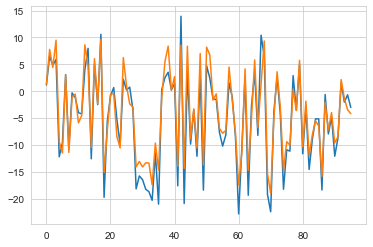

In [19]:
from matplotlib import pyplot as plt
plt.plot([i for i in range(len(lr_y))],lr_y,label = "Actual y")
plt.plot([i for i in range(len(lr_y))],lr_y_pred,label = "Predicted y")
plt.show()

# Helper functions for reshaping

In [2]:
def reshape_to_window(dataset,window_size,target_value = "y", include_target = False,drop_columns = None): #hourly scope
    columns_size = dataset.shape[1]
    create_a_row = []
    columns_to_save_after_proceed = None
    target_values = dataset.iloc[window_size-1:,][target_value].values
    if(drop_columns!=None):
        columns_to_save_after_proceed = dataset.iloc[window_size-1:,][drop_columns]
        columns_to_save_after_proceed = columns_to_save_after_proceed.reset_index(drop = True)
        dataset = dataset.drop(columns = drop_columns,axis = 1)
    for r in range(dataset.shape[0]-window_size+1):
        create_a_row.append({})
        for row in range(window_size):
            for col in dataset.columns:
                if(col==target_value and row == window_size-1):
                    continue
                elif(col == target_value and include_target == False):
                    continue
                else:
                    create_a_row[r][f"{col}({row})"] = dataset[col][dataset[col].index[row+r]]
    
    create_a_row = pd.DataFrame(create_a_row)
    result = create_a_row
    print(len(target_values))
    result[target_value] = target_values 
    if(drop_columns!=None):
        result = pd.concat([columns_to_save_after_proceed,create_a_row],axis = 1)
    return result

def reshape_whole_table(dataset,window_size,target_value = "y", include_target = False,drop_columns = None):
    hours = list(set(dataset["hour"]))
    xs = list(set(dataset["x"]))
    ys = list(set(dataset["y"]))
    
    result = pd.DataFrame()
    
    for x in xs:
        for y in ys:
            temp = dataset.loc[(( dataset["x"] == x) & (dataset["y"] == y))]
            temp = reshape_to_window(temp,window_size=window_size,include_target=include_target,drop_columns=drop_columns,target_value=target_value)
            result = pd.concat([result,temp])
    return result
    
def predict_cell_and_build_plot(model, cell):
    pass

    

# My dataframes

In [3]:
spec1_in = pd.read_csv("../data/result1_species_in.csv",sep = ";")
res_cols = spec1_in.columns[0:3].values.tolist()+spec1_in.columns[4:].values.tolist()+[spec1_in.columns[3]]
spec1_in = spec1_in[res_cols]
spec1_in["wind"] = 2.4573338 # simulate wind
spec1_in

,x,y,hour,nbr,nbl,nbu,nbd,emission_value,wind
0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.457334
1,0,0,1,0.0,0.0,0.0,0.0,0.0,2.457334
2,0,0,2,0.0,0.0,0.0,0.0,0.0,2.457334
3,0,0,3,0.0,0.0,0.0,0.0,0.0,2.457334
4,0,0,4,0.0,0.0,0.0,0.0,0.0,2.457334
...,...,...,...,...,...,...,...,...,...
119995,49,49,43,0.0,0.0,0.0,0.0,0.0,2.457334
119996,49,49,44,0.0,0.0,0.0,0.0,0.0,2.457334
119997,49,49,45,0.0,0.0,0.0,0.0,0.0,2.457334
119998,49,49,46,0.0,0.0,0.0,0.0,0.0,2.457334


In [4]:
spec1_out = pd.read_csv("../data/result1_species_out.csv",sep = ";")
spec1_out.columns = spec1_out.columns+"_out" #renaming columns
res_cols = spec1_out.columns[0:3].values.tolist()+spec1_out.columns[4:].values.tolist()+[spec1_out.columns[3]]
spec1_out = spec1_out[res_cols]
spec1_out

,x_out,y_out,hour_out,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
0,0,0,1,0.0,0.000000e+00,0.000000e+00,0.000087,8.815081e-05
1,0,0,2,0.0,0.000000e+00,0.000000e+00,0.000028,3.298550e-05
2,0,0,3,0.0,0.000000e+00,0.000000e+00,0.000048,5.620945e-05
3,0,0,4,0.0,0.000000e+00,0.000000e+00,0.000506,5.168101e-04
4,0,0,5,0.0,0.000000e+00,0.000000e+00,0.004548,4.583161e-03
...,...,...,...,...,...,...,...,...
119995,49,49,44,0.0,1.603733e-06,1.693905e-06,0.000000,1.665753e-06
119996,49,49,45,0.0,6.138296e-06,6.684226e-06,0.000000,5.869731e-06
119997,49,49,46,0.0,9.832816e-07,8.831243e-07,0.000000,8.536082e-07
119998,49,49,47,0.0,5.749978e-07,5.290955e-07,0.000000,5.267595e-07


### Join in and out table

In [5]:
spec1_trainset = pd.concat((spec1_in,spec1_out[spec1_out.columns[3:]]),axis=1)
spec1_trainset

,x,y,hour,nbr,nbl,nbu,nbd,emission_value,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000e+00,0.000000e+00,0.000087,8.815081e-05
1,0,0,1,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000e+00,0.000000e+00,0.000028,3.298550e-05
2,0,0,2,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000e+00,0.000000e+00,0.000048,5.620945e-05
3,0,0,3,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000e+00,0.000000e+00,0.000506,5.168101e-04
4,0,0,4,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000e+00,0.000000e+00,0.004548,4.583161e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,49,49,43,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,1.603733e-06,1.693905e-06,0.000000,1.665753e-06
119996,49,49,44,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,6.138296e-06,6.684226e-06,0.000000,5.869731e-06
119997,49,49,45,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,9.832816e-07,8.831243e-07,0.000000,8.536082e-07
119998,49,49,46,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,5.749978e-07,5.290955e-07,0.000000,5.267595e-07


In [6]:
test2525 = spec1_trainset.loc[(( spec1_trainset["x"] <= 15) & (spec1_trainset["y"] <= 15))]
test2525

,x,y,hour,nbr,nbl,nbu,nbd,emission_value,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
0,0,0,0,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,0.000000,0.000000e+00,0.000087,8.815081e-05
1,0,0,1,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,0.000000,0.000000e+00,0.000028,3.298550e-05
2,0,0,2,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,0.000000,0.000000e+00,0.000048,5.620945e-05
3,0,0,3,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,0.000000,0.000000e+00,0.000506,5.168101e-04
4,0,0,4,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,0.000000,0.000000e+00,0.004548,4.583161e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,15,15,43,0.0,0.0,0.000201,0.0,0.0,2.457334,0.0,0.000074,9.179690e-05,0.000000,5.512022e-05
36764,15,15,44,0.0,0.0,0.000805,0.0,0.0,2.457334,0.0,0.000172,2.646376e-04,0.000000,1.156099e-04
36765,15,15,45,0.0,0.0,0.002076,0.0,0.0,2.457334,0.0,0.000633,8.639015e-04,0.000000,4.069697e-04
36766,15,15,46,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,0.000007,5.814928e-06,0.000000,8.361745e-06


In [7]:
window_size = 4
ml_spec1_trainset = reshape_whole_table(test2525,window_size,target_value="emission_value_out",drop_columns=["x","y"],include_target=False)
ml_spec1_trainset

45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45


,x,y,hour(0),nbr(0),nbl(0),nbu(0),nbd(0),emission_value(0),wind(0),nbr_out(0),...,nbl(3),nbu(3),nbd(3),emission_value(3),wind(3),nbr_out(3),nbl_out(3),nbu_out(3),nbd_out(3),emission_value_out
0,0,0,0,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.0,0.000000,0.0,0.0,2.457334,0.0,0.000000,0.000000e+00,0.000506,5.168101e-04
1,0,0,1,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.0,0.000000,0.0,0.0,2.457334,0.0,0.000000,0.000000e+00,0.004548,4.583161e-03
2,0,0,2,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.0,0.000000,0.0,0.0,2.457334,0.0,0.000000,0.000000e+00,0.008110,8.234370e-03
3,0,0,3,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.0,0.000000,0.0,0.0,2.457334,0.0,0.000000,0.000000e+00,0.007656,7.697428e-03
4,0,0,4,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.0,0.000000,0.0,0.0,2.457334,0.0,0.000000,0.000000e+00,0.006644,6.684830e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,15,15,40,0.0,0.0,0.006468,0.0,0.0,2.457334,0.0,...,0.0,0.000201,0.0,0.0,2.457334,0.0,0.000074,9.179690e-05,0.000000,5.512022e-05
41,15,15,41,0.0,0.0,0.002058,0.0,0.0,2.457334,0.0,...,0.0,0.000805,0.0,0.0,2.457334,0.0,0.000172,2.646376e-04,0.000000,1.156099e-04
42,15,15,42,0.0,0.0,0.002386,0.0,0.0,2.457334,0.0,...,0.0,0.002076,0.0,0.0,2.457334,0.0,0.000633,8.639015e-04,0.000000,4.069697e-04
43,15,15,43,0.0,0.0,0.000201,0.0,0.0,2.457334,0.0,...,0.0,0.000000,0.0,0.0,2.457334,0.0,0.000007,5.814928e-06,0.000000,8.361745e-06


But out emiission of values of neighnbours in (3) contain additional information of emission value in certain cell, that we doesn't have, so we need to filter them out 

In [8]:

ml_spec1_trainset = ml_spec1_trainset.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)
ml_spec1_trainset

,x,y,hour(0),nbr(0),nbl(0),nbu(0),nbd(0),emission_value(0),wind(0),nbr_out(0),...,nbu_out(2),nbd_out(2),hour(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value(3),wind(3),emission_value_out
0,0,0,0,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.000000,0.000048,3,0.0,0.0,0.000000,0.0,0.0,2.457334,5.168101e-04
1,0,0,1,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.000000,0.000506,4,0.0,0.0,0.000000,0.0,0.0,2.457334,4.583161e-03
2,0,0,2,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.000000,0.004548,5,0.0,0.0,0.000000,0.0,0.0,2.457334,8.234370e-03
3,0,0,3,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.000000,0.008110,6,0.0,0.0,0.000000,0.0,0.0,2.457334,7.697428e-03
4,0,0,4,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.000000,0.007656,7,0.0,0.0,0.000000,0.0,0.0,2.457334,6.684830e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,15,15,40,0.0,0.0,0.006468,0.0,0.0,2.457334,0.0,...,0.000735,0.000000,43,0.0,0.0,0.000201,0.0,0.0,2.457334,5.512022e-05
41,15,15,41,0.0,0.0,0.002058,0.0,0.0,2.457334,0.0,...,0.000092,0.000000,44,0.0,0.0,0.000805,0.0,0.0,2.457334,1.156099e-04
42,15,15,42,0.0,0.0,0.002386,0.0,0.0,2.457334,0.0,...,0.000265,0.000000,45,0.0,0.0,0.002076,0.0,0.0,2.457334,4.069697e-04
43,15,15,43,0.0,0.0,0.000201,0.0,0.0,2.457334,0.0,...,0.000864,0.000000,46,0.0,0.0,0.000000,0.0,0.0,2.457334,8.361745e-06


In [222]:
division_row = 20
trainset = ml_spec1_trainset.loc[:division_row,]
testset = ml_spec1_trainset.loc[division_row+1:,]
trainset

,x,y,hour(0),nbr(0),nbl(0),nbu(0),nbd(0),emission_value(0),wind(0),nbr_out(0),...,nbu_out(2),nbd_out(2),hour(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value(3),wind(3),emission_value_out
0,25,25,0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000140,...,0.000049,0.000050,3,0.0,0.0,0.0,0.0,0.0,2.457334,0.000644
1,25,25,1,0.0,0.0,0.0,0.0,0.0,2.457334,0.000027,...,0.000632,0.000633,4,0.0,0.0,0.0,0.0,0.0,2.457334,0.004846
2,25,25,2,0.0,0.0,0.0,0.0,0.0,2.457334,0.000041,...,0.004818,0.004812,5,0.0,0.0,0.0,0.0,0.0,2.457334,0.006625
3,25,25,3,0.0,0.0,0.0,0.0,0.0,2.457334,0.000605,...,0.006610,0.006596,6,0.0,0.0,0.0,0.0,0.0,2.457334,0.007019
4,25,25,4,0.0,0.0,0.0,0.0,0.0,2.457334,0.004757,...,0.007017,0.007005,7,0.0,0.0,0.0,0.0,0.0,2.457334,0.006380
5,25,25,5,0.0,0.0,0.0,0.0,0.0,2.457334,0.006564,...,0.006378,0.006370,8,0.0,0.0,0.0,0.0,0.0,2.457334,0.005780
6,25,25,6,0.0,0.0,0.0,0.0,0.0,2.457334,0.007001,...,0.005778,0.005767,9,0.0,0.0,0.0,0.0,0.0,2.457334,0.005549
7,25,25,7,0.0,0.0,0.0,0.0,0.0,2.457334,0.006363,...,0.005546,0.005534,10,0.0,0.0,0.0,0.0,0.0,2.457334,0.005054
8,25,25,8,0.0,0.0,0.0,0.0,0.0,2.457334,0.005771,...,0.005055,0.005036,11,0.0,0.0,0.0,0.0,0.0,2.457334,0.005218
9,25,25,9,0.0,0.0,0.0,0.0,0.0,2.457334,0.005528,...,0.005215,0.005202,12,0.0,0.0,0.0,0.0,0.0,2.457334,0.005470


In [12]:
trainset = ml_spec1_trainset
testset = trainset
trainset
trainset

,x,y,hour(0),nbr(0),nbl(0),nbu(0),nbd(0),emission_value(0),wind(0),nbr_out(0),...,nbu_out(2),nbd_out(2),hour(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value(3),wind(3),emission_value_out
0,0,0,0,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.000000,0.000048,3,0.0,0.0,0.000000,0.0,0.0,2.457334,5.168101e-04
1,0,0,1,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.000000,0.000506,4,0.0,0.0,0.000000,0.0,0.0,2.457334,4.583161e-03
2,0,0,2,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.000000,0.004548,5,0.0,0.0,0.000000,0.0,0.0,2.457334,8.234370e-03
3,0,0,3,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.000000,0.008110,6,0.0,0.0,0.000000,0.0,0.0,2.457334,7.697428e-03
4,0,0,4,0.0,0.0,0.000000,0.0,0.0,2.457334,0.0,...,0.000000,0.007656,7,0.0,0.0,0.000000,0.0,0.0,2.457334,6.684830e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,15,15,40,0.0,0.0,0.006468,0.0,0.0,2.457334,0.0,...,0.000735,0.000000,43,0.0,0.0,0.000201,0.0,0.0,2.457334,5.512022e-05
41,15,15,41,0.0,0.0,0.002058,0.0,0.0,2.457334,0.0,...,0.000092,0.000000,44,0.0,0.0,0.000805,0.0,0.0,2.457334,1.156099e-04
42,15,15,42,0.0,0.0,0.002386,0.0,0.0,2.457334,0.0,...,0.000265,0.000000,45,0.0,0.0,0.002076,0.0,0.0,2.457334,4.069697e-04
43,15,15,43,0.0,0.0,0.000201,0.0,0.0,2.457334,0.0,...,0.000864,0.000000,46,0.0,0.0,0.000000,0.0,0.0,2.457334,8.361745e-06


### Train on train grid(can be a cell)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
lr_model = LinearRegression()
lr_model.fit(trainset[[x for x in trainset.columns if x != "emission_value_out"]], trainset["emission_value_out"])

t0 = time.time()
lr_y = testset['emission_value_out'].values
lr_y_fit = lr_model.predict(trainset[[x for x in trainset.columns if x != "emission_value_out"]])
lr_y_pred = lr_model.predict(testset[[x for x in testset.columns if x != "emission_value_out"]])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y,lr_y_pred))
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 0.0025771538
MAE = 0.0015404437
Time to train = 0.01 seconds


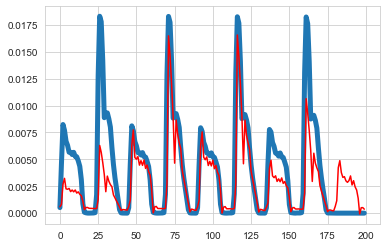

In [14]:
from matplotlib import pyplot as plt
(ystart,yend)  = (0,200)
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Test on test grid(can be a cell)

In [37]:
testset3030  = spec1_trainset.loc[(spec1_trainset["x"] >15 ) & (spec1_trainset["y"] > 15)]
testset3030

,x,y,hour,nbr,nbl,nbu,nbd,emission_value,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
39168,16,16,0,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
39169,16,16,1,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
39170,16,16,2,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
39171,16,16,3,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
39172,16,16,4,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,49,49,43,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,1.603733e-06,1.693905e-06,0.0,1.665753e-06
119996,49,49,44,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,6.138296e-06,6.684226e-06,0.0,5.869731e-06
119997,49,49,45,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,9.832816e-07,8.831243e-07,0.0,8.536082e-07
119998,49,49,46,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,5.749978e-07,5.290955e-07,0.0,5.267595e-07


In [38]:
window_size = 4
ml_testset3030 = reshape_whole_table(testset3030,window_size =window_size,drop_columns=["x","y"],target_value="emission_value_out")
ml_testset3030 = ml_testset3030.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)
ml_testset3030


45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
45
4

,x,y,hour(0),nbr(0),nbl(0),nbu(0),nbd(0),emission_value(0),wind(0),nbr_out(0),...,nbu_out(2),nbd_out(2),hour(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value(3),wind(3),emission_value_out
0,16,16,0,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,...,0.000000e+00,0.0,3,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000e+00
1,16,16,1,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,...,0.000000e+00,0.0,4,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000e+00
2,16,16,2,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,...,0.000000e+00,0.0,5,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000e+00
3,16,16,3,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,...,0.000000e+00,0.0,6,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000e+00
4,16,16,4,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,...,0.000000e+00,0.0,7,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,49,49,40,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,...,2.290073e-04,0.0,43,0.0,0.0,0.0,0.0,0.0,2.457334,1.665753e-06
41,49,49,41,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,...,1.693905e-06,0.0,44,0.0,0.0,0.0,0.0,0.0,2.457334,5.869731e-06
42,49,49,42,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,...,6.684226e-06,0.0,45,0.0,0.0,0.0,0.0,0.0,2.457334,8.536082e-07
43,49,49,43,0.0,0.0,0.0,0.0,0.0,2.457334,0.0,...,8.831243e-07,0.0,46,0.0,0.0,0.0,0.0,0.0,2.457334,5.267595e-07


In [54]:
test_lr_y = ml_testset3030["emission_value_out"].values
test_lr_y_pred = lr_model.predict(ml_testset3030[[x for x in ml_testset3030.columns if x != "emission_value_out"]])


test_lr_residuals = test_lr_y_pred - test_lr_y
test_lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(test_lr_y,test_lr_y_pred))
print('MAPE = %.2f' % mean_absolute_percentage_error(test_lr_y,test_lr_y_pred) +"%")

(ystart,yend)  = (0,1000)
plt.plot([i for i in range(len(test_lr_y[ystart:yend]))],test_lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(test_lr_y_pred[ystart:yend]))],test_lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- pred_emission_value_out
- pred_emmision_value_out


### Adding predicted colmn and results visualization

In [48]:
ml_testset3030["pred_emission_value_out"] = test_lr_y_pred
viz_ml = ml_testset3030

In [49]:
import seaborn as sns
import matplotlib.pylab as plt
def make_heatmap_from_pd(result_dataframe,hour,hour_name = "hour",target_name = "emission_value"):
    result_1specieshour = result_dataframe.loc[result_dataframe[hour_name] == hour]
    result_1specieshour = result_1specieshour[["x","y",target_name]]

    x, y = result_1specieshour[["x", "y"]].max() + 1- min(result_1specieshour[ "x"].values)
    v = result_1specieshour[target_name].to_numpy().reshape((x, y))
    indices = result_1specieshour[["x", 'y']].to_numpy().T

    v = np.tile(np.nan, indices.max(axis=1) + 1)
    v[tuple(indices)] = result_1specieshour[target_name]
    ax = sns.heatmap(v)
    plt.show()

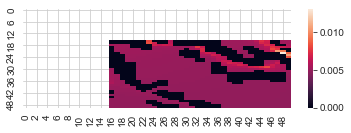

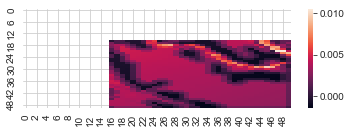

In [63]:
hour = 14
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")

In [34]:
min(ml_testset3030["x"].values + ml_testset3030[ "y"].values)

16